In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Admin/Desktop/Github_projects/Stock_Market_for_noobs/FLGT.csv" , encoding = "ISO-8859-1")
df.shape

(755, 7)

In [3]:
df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,3.980000,3.980000,3.670000,3.700000,3.700000,36100
2018-09-11,3.830000,4.000000,3.550000,3.550000,3.550000,32100
2018-09-12,3.550000,3.680000,3.480000,3.510000,3.510000,4700
2018-09-13,3.680000,3.690000,3.500000,3.500000,3.500000,4300
2018-09-14,3.730000,3.730000,3.510000,3.510000,3.510000,1000
...,...,...,...,...,...,...
2021-09-01,91.000000,94.800003,89.699997,92.360001,92.360001,508900
2021-09-02,91.739998,95.870003,91.230003,94.120003,94.120003,403300
2021-09-03,93.849998,95.879997,93.220001,94.000000,94.000000,383000


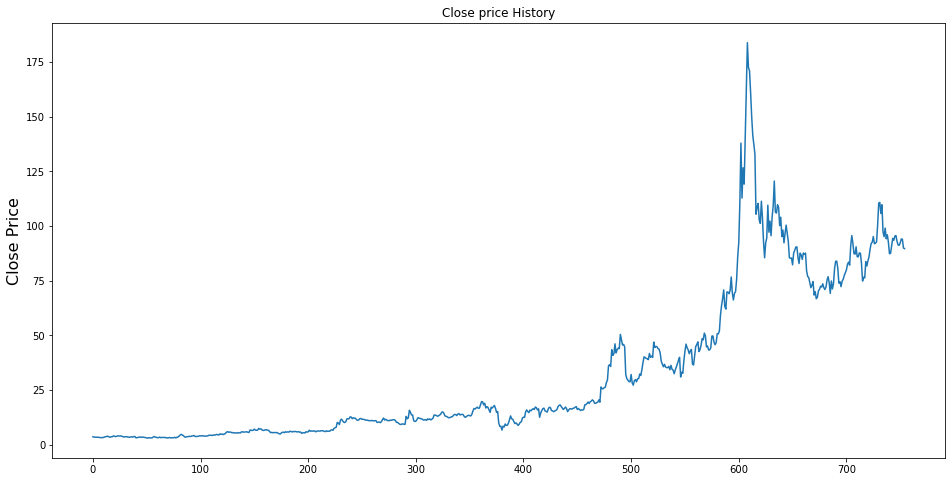

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.ylabel('Close Price', fontsize=16)
plt.show()

In [5]:
df1 = df.dropna(how="any")

In [6]:
data1 = df1.filter(['Close'])
data1

,Close
0,3.700000
1,3.550000
2,3.510000
3,3.500000
4,3.510000
...,...
750,92.360001
751,94.120003
752,94.000000
753,89.989998


In [7]:
data = data1.values
data

array([[  3.7     ],
       [  3.55    ],
       [  3.51    ],
       [  3.5     ],
       [  3.51    ],
       [  3.476   ],
       [  3.37    ],
       [  3.32    ],
       [  3.335   ],
       [  3.29    ],
       [  3.44    ],
       [  3.66    ],
       [  3.71    ],
       [  3.9     ],
       [  3.93    ],
       [  3.61    ],
       [  3.47    ],
       [  3.71    ],
       [  3.71    ],
       [  4.09    ],
       [  3.97    ],
       [  3.77    ],
       [  3.9     ],
       [  4.09    ],
       [  4.09    ],
       [  4.      ],
       [  4.09    ],
       [  3.9     ],
       [  3.7     ],
       [  3.61    ],
       [  3.66    ],
       [  3.76    ],
       [  3.67    ],
       [  3.54    ],
       [  3.44    ],
       [  3.6     ],
       [  3.7     ],
       [  3.56    ],
       [  3.8     ],
       [  3.8     ],
       [  3.2     ],
       [  3.28    ],
       [  3.42    ],
       [  3.5     ],
       [  3.595   ],
       [  3.4     ],
       [  3.52    ],
       [  3.5

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[3.20920700e-03],
       [2.37923967e-03],
       [2.15791505e-03],
       [2.10258390e-03],
       [2.15791505e-03],
       [1.96978912e-03],
       [1.38327888e-03],
       [1.10662310e-03],
       [1.18961984e-03],
       [9.40629637e-04],
       [1.77059696e-03],
       [2.98788238e-03],
       [3.26453815e-03],
       [4.31583010e-03],
       [4.48182357e-03],
       [2.71122660e-03],
       [1.93659043e-03],
       [3.26453815e-03],
       [3.26453815e-03],
       [5.36712205e-03],
       [4.70314819e-03],
       [3.59652508e-03],
       [4.31583010e-03],
       [5.36712205e-03],
       [5.36712205e-03],
       [4.86914165e-03],
       [5.36712205e-03],
       [4.31583010e-03],
       [3.20920700e-03],
       [2.71122660e-03],
       [2.98788238e-03],
       [3.54119393e-03],
       [3.04321353e-03],
       [2.32390852e-03],
       [1.77059696e-03],
       [2.65589545e-03],
       [3.20920700e-03],
       [2.43457083e-03],
       [3.76251855e-03],
       [3.76251855e-03],


In [9]:
train_data_len = math.ceil(len(data) * 0.70)
train_data = scaled_data[0:train_data_len, :]

In [10]:
p=120
x_train = []
y_train = []
for i in range(p, len(train_data)):
    x_train.append(train_data[i-p:i, 0])
    y_train.append(train_data[i, 0])
    if i<=p+1:
        print(x_train)
        print(y_train)

[array([0.00320921, 0.00237924, 0.00215792, 0.00210258, 0.00215792,
       0.00196979, 0.00138328, 0.00110662, 0.00118962, 0.00094063,
       0.0017706 , 0.00298788, 0.00326454, 0.00431583, 0.00448182,
       0.00271123, 0.00193659, 0.00326454, 0.00326454, 0.00536712,
       0.00470315, 0.00359653, 0.00431583, 0.00536712, 0.00536712,
       0.00486914, 0.00536712, 0.00431583, 0.00320921, 0.00271123,
       0.00298788, 0.00354119, 0.00304321, 0.00232391, 0.0017706 ,
       0.0026559 , 0.00320921, 0.00243457, 0.00376252, 0.00376252,
       0.00044265, 0.0008853 , 0.00165993, 0.00210258, 0.00262823,
       0.00154927, 0.00221325, 0.00230178, 0.00141094, 0.00116195,
       0.        , 0.        , 0.00099596, 0.00022132, 0.00016599,
       0.00069164, 0.00243457, 0.00370719, 0.00237924, 0.0016046 ,
       0.0008853 , 0.00094063, 0.00221325, 0.00105129, 0.00138328,
       0.00141094, 0.00132795, 0.00144968, 0.00090743, 0.00011066,
       0.00082997, 0.00127262, 0.00044265, 0.00055331, 0.0007

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(409, 120, 1)

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=2, epochs=10)

Epoch 1/10
205/205 [==============================] - 14s 69ms/step - loss: 6.2141e-04
Epoch 2/10
205/205 [==============================] - 15s 75ms/step - loss: 4.1936e-04
Epoch 3/10
205/205 [==============================] - 13s 66ms/step - loss: 2.7588e-04
Epoch 4/10
205/205 [==============================] - 22s 107ms/step - loss: 2.1418e-04
Epoch 5/10
205/205 [==============================] - 24s 117ms/step - loss: 2.1137e-04
Epoch 6/10
205/205 [==============================] - 22s 108ms/step - loss: 1.4737e-04
Epoch 7/10
205/205 [==============================] - 23s 111ms/step - loss: 1.7282e-04
Epoch 8/10
205/205 [==============================] - 23s 110ms/step - loss: 1.2960e-04
Epoch 9/10
205/205 [==============================] - 19s 95ms/step - loss: 1.3908e-04
Epoch 10/10
205/205 [==============================] - 15s 72ms/step - loss: 1.1070e-04


In [14]:
test_data = scaled_data[train_data_len - p: , :]
x_test = []
y_test = data[train_data_len:, :]
for i in range(p, len(test_data)):
    x_test.append(test_data[i-p:i, 0])

In [15]:
x_test = np.array(x_test)
x_test.shape

(226, 120)

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)

In [18]:
rmse = np.sqrt(np.mean(predict - y_test)**2)
rmse

4.254929678091945

<ipython-input-19-fc40edb2b829>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predict


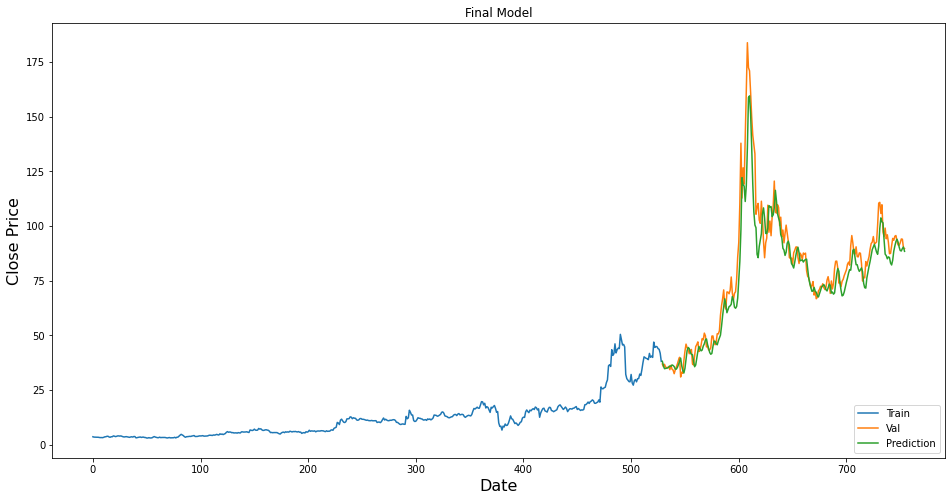

In [19]:
train = data1[:train_data_len]
valid = data1[train_data_len:]
valid['Prediction'] = predict
plt.figure(figsize=(16,8))
plt.title('Final Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [20]:
df2 = pd.read_csv("C:/Users/Admin/Desktop/Github_projects/Stock_Market_for_noobs/FLGT.csv" , encoding = "ISO-8859-1")
new_df = df2.filter(['Close'])
new_df1 = new_df.dropna(how="any")
new_df2 = new_df1.values
data2_len = 342
data2 = new_df2[0:data2_len, :]
data2.shape

(342, 1)

In [21]:
last_days = data2[-p:]
last_days_scaled = scaler.transform(last_days)
X_test = []
X_test.append(last_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[14.812282]]


In [22]:
x_input = test_data[226:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
lst_output = []
n_steps = p
i=0
num = int(input())
while(i<num):
    
    if(len(temp_input)>p):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

20
121
[[0.46306321024894714], [0.44981497526168823], [0.43587833642959595], [0.4223760664463043], [0.4101159870624542], [0.39971449971199036], [0.39158305525779724], [0.38591524958610535], [0.38269367814064026], [0.3817135989665985], [0.3826182186603546], [0.3849382698535919], [0.3881317973136902], [0.39162442088127136], [0.3948465883731842], [0.39727020263671875], [0.3984428346157074], [0.3980194330215454], [0.3957880437374115], [0.3916880190372467]]


In [23]:
output = scaler.inverse_transform(lst_output)
output

array([[86.80941677],
       [84.41506318],
       [81.89629436],
       [79.45602902],
       [77.2402648 ],
       [75.36040393],
       [73.89080793],
       [72.86646537],
       [72.28423075],
       [72.10710103],
       [72.27059295],
       [72.68989582],
       [73.26706206],
       [73.89828394],
       [74.48062629],
       [74.91864611],
       [75.13057589],
       [75.05405452],
       [74.65077552],
       [73.90977803]])

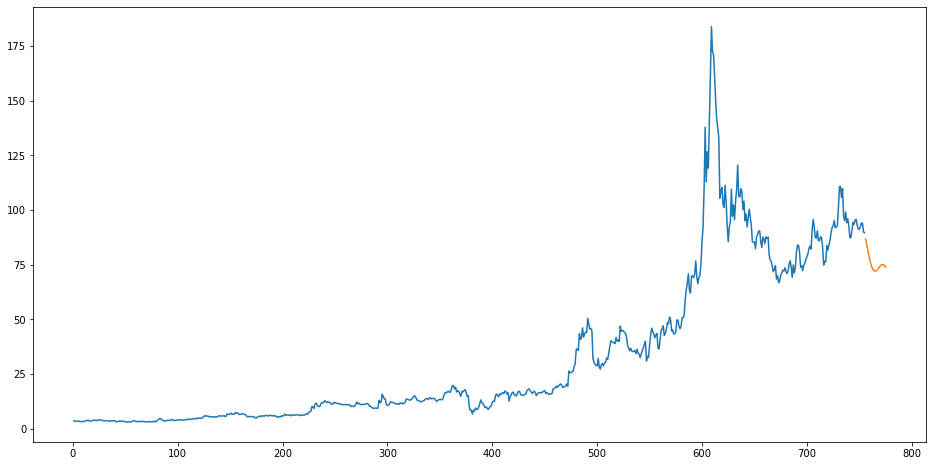

In [24]:
day_new = np.arange(1,756)
day_pred = np.arange(756,756+num)
plt.figure(figsize=(16,8))
plt.plot(day_new,data1[['Close']])
plt.plot(day_pred,output)
plt.show()

In [43]:
y = test_data[226:].reshape(1,-1)
temp1 = list(y)
temp1 = temp1[0].tolist()
lst1 = []
n1 = p
j=0
num = 20
while(j<num):
    
    if(len(temp1)>p):
        y=np.array(temp1[1:])
        y=y.reshape(1,-1)
        y = y.reshape((1, n1, 1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        temp1=temp1[1:]
        lst1.extend(yhat1.tolist())
        j=j+1
    else:
        y = y.reshape((1, n1,1))
        yhat1 = model.predict(y)
        temp1.extend(yhat1[0].tolist())
        print(len(temp1))
        lst1.extend(yhat1.tolist())
        j=j+1
    

print(lst1)

121
[[0.46306321024894714], [0.44981497526168823], [0.43587833642959595], [0.4223760664463043], [0.4101159870624542], [0.39971449971199036], [0.39158305525779724], [0.38591524958610535], [0.38269367814064026], [0.3817135989665985], [0.3826182186603546], [0.3849382698535919], [0.3881317973136902], [0.39162442088127136], [0.3948465883731842], [0.39727020263671875], [0.3984428346157074], [0.3980194330215454], [0.3957880437374115], [0.3916880190372467]]


In [44]:
out = scaler.inverse_transform(lst1)
out

array([[86.80941677],
       [84.41506318],
       [81.89629436],
       [79.45602902],
       [77.2402648 ],
       [75.36040393],
       [73.89080793],
       [72.86646537],
       [72.28423075],
       [72.10710103],
       [72.27059295],
       [72.68989582],
       [73.26706206],
       [73.89828394],
       [74.48062629],
       [74.91864611],
       [75.13057589],
       [75.05405452],
       [74.65077552],
       [73.90977803]])

In [45]:
lst2 = out.tolist()
lst2

[[86.80941676667148],
 [84.41506317793475],
 [81.89629435819089],
 [79.45602902309697],
 [77.24026480249327],
 [75.36040393123501],
 [73.89080792624003],
 [72.86646537318832],
 [72.28423074651998],
 [72.10710103151494],
 [72.2705929541952],
 [72.68989582026929],
 [73.26706205729401],
 [73.8982839356187],
 [74.48062628576511],
 [74.91864610615539],
 [75.1305758907538],
 [75.0540545181005],
 [74.65077551939063],
 [73.90977803072971]]

In [46]:
from itertools import chain

In [47]:
lst3 = list(chain.from_iterable(lst2))
lst3

[86.80941676667148,
 84.41506317793475,
 81.89629435819089,
 79.45602902309697,
 77.24026480249327,
 75.36040393123501,
 73.89080792624003,
 72.86646537318832,
 72.28423074651998,
 72.10710103151494,
 72.2705929541952,
 72.68989582026929,
 73.26706205729401,
 73.8982839356187,
 74.48062628576511,
 74.91864610615539,
 75.1305758907538,
 75.0540545181005,
 74.65077551939063,
 73.90977803072971]

In [48]:
def findmin(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==0 and arr[i]<arr[i+1]:
                ans.append((arr[i],i))
            if i==len(arr)-1 and arr[i-1]> arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] >arr[i] and arr[i]< arr[i+1]:
                ans.append((arr[i],i))
    return ans

mn = findmin(lst3)
print(mn)

[(72.10710103151494, 9), (73.90977803072971, 19)]


In [49]:
def findmax(arr):
    ans =[]
    for i in range(len(arr)):
        if i==0 or i==len(arr)-1:
            if i==len(arr)-1 and arr[i-1]<arr[i]:
                ans.append((arr[i],i))
        else:
            if arr[i-1] <arr[i] and arr[i]> arr[i+1]:
                ans.append((arr[i],i))
    return ans

mx = findmax(lst3)
print(mx)

[(75.1305758907538, 16)]


In [50]:
def maxprofit(mn,mx):
    profit =[]
    for x,i in mn:
        for y,j in mx:
            if y-x>0 and j>i:
                profit.append((i,j,y-x))
    return profit

profit = maxprofit(mn,mx)
print(profit)

[(9, 16, 3.02347485923886)]


In [51]:
def finalProfit(profit):
    mx = -1
    px,py,pro = 0,0,0
    for x,y,p in profit:
        if p>=mx:
            px,py,pro =x,y,p
            mx =p 
    return (px,py,pro)
    
print(finalProfit(profit))

(9, 16, 3.02347485923886)


In [52]:
import json

In [54]:
json_file = model.to_json()
with open('FLGT_model', 'w') as file:
   file.write(json_file)
model.save_weights('FLGT_model')

In [56]:
from keras.models import model_from_json
# load json and create model
file = open('FLGT_model', 'r')
model_json = file.read()
file.close()
loaded_model = model_from_json(model_json)
# load weights
loaded_model.load_weights('FLGT_model')

In [57]:
s = loaded_model.predict(x_test)
scaler.inverse_transform(s)

array([[ 38.198822],
       [ 36.20928 ],
       [ 34.820095],
       [ 34.939415],
       [ 35.0155  ],
       [ 35.173546],
       [ 35.496243],
       [ 36.07654 ],
       [ 35.85919 ],
       [ 36.530403],
       [ 36.286636],
       [ 35.768475],
       [ 34.63139 ],
       [ 34.617188],
       [ 35.426468],
       [ 36.700005],
       [ 38.242874],
       [ 39.662575],
       [ 36.12738 ],
       [ 34.034492],
       [ 32.850655],
       [ 34.998608],
       [ 38.960724],
       [ 43.09246 ],
       [ 44.526894],
       [ 44.025932],
       [ 42.218987],
       [ 41.35415 ],
       [ 41.213497],
       [ 38.133873],
       [ 35.71124 ],
       [ 36.514137],
       [ 39.804604],
       [ 42.768528],
       [ 44.99996 ],
       [ 43.92294 ],
       [ 42.974712],
       [ 43.349194],
       [ 45.17305 ],
       [ 46.17564 ],
       [ 47.980965],
       [ 48.44124 ],
       [ 45.86662 ],
       [ 43.977837],
       [ 42.22055 ],
       [ 41.423603],
       [ 41.787388],
       [ 44.9